In [1]:
%cd "D:\Users\sean.ogara\Documents\ons-energy-analysis"

d:\Users\sean.ogara\Documents\ons-energy-analysis


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from src.visualisations.scatter_chart import scatter_chart

In [3]:
electricity_price_data = pd.read_csv("data/processed/global_electricity_household_prices.csv")
electricity_price_data.head()

,country,iso2,iso3,price
0,Lebanon,LB,LBN,0.001
1,Iran,IR,IRN,0.002
2,Syria,SY,SYR,0.004
3,Ethiopia,ET,ETH,0.005
4,Sudan,SD,SDN,0.007


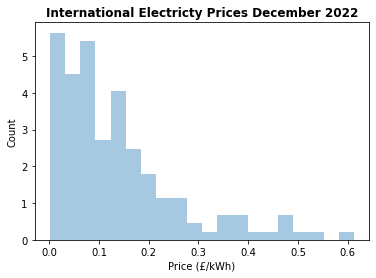

In [4]:
#distribution of prices
num_bins = 20
n, bins, patches = plt.hist(electricity_price_data['price'], num_bins,
                            density = 1,
                            color ='#80b1d3',
                            alpha = 0.7)

plt.xlabel('Price (£/kWh)')
plt.ylabel('Count')
plt.title('International Electricty Prices December 2022',
          fontweight = 'bold')
plt.show()

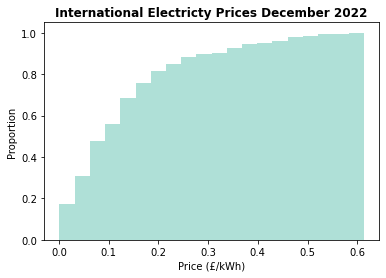

In [5]:
#distribution of prices
num_bins = 20
n, bins, patches = plt.hist(electricity_price_data['price'], num_bins,
                            density = 1,
                            color ='#8dd3c7',
                            alpha = 0.7,
                            cumulative=True)

plt.xlabel('Price (£/kWh)')
plt.ylabel('Proportion')
plt.title('International Electricty Prices December 2022',
          fontweight = 'bold')
plt.show()

In [6]:
#global mean price
global_mean_price = electricity_price_data['price'].mean()
global_mean_price

0.13707586206896552

In [7]:
#uk price
uk_price = electricity_price_data[electricity_price_data['iso2'] == 'GB']['price'].values[0]
uk_price

0.387

In [8]:
#ratio between uk and global mean
uk_price / global_mean_price

2.823254175890521

In [9]:
#bring in energy mix data
energy_mix_data = pd.read_csv("data/raw/owid-energy-data.csv")
energy_mix_data.tail()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22011,Zimbabwe,2022,ZWE,16320539.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#filter for 2021 as this is the most recent complete data
energy_mix_2021 = energy_mix_data.loc[energy_mix_data['year'] == 2021, :]
energy_mix_2021.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983,NaN,NaN,NaN,NaN,NaN,8.30,NaN,0.719,NaN
144,Afghanistan,2021,AFG,4.009946e+07,NaN,NaN,NaN,NaN,NaN,0.000,...,9.639,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
266,Africa,2021,NaN,1.393677e+09,NaN,27.27,0.238,0.796,1.11,2.705,...,2.040,0.835,19.233,9.431,59.609,14.989,20.89,42.771,2.489,1.062
324,Africa (EI),2021,NaN,NaN,NaN,27.27,0.238,NaN,1.11,NaN,...,1.996,0.835,19.233,9.432,59.609,NaN,22.78,NaN,2.540,1.062
347,Africa (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040,NaN,NaN,NaN,NaN,NaN,20.89,NaN,2.489,NaN


In [11]:
#fileter for columns of interest
cols_of_interest = [
                    'country', 
                    'year',
                    'iso_code',
                    'population',
                    'energy_per_capita',
                    'fossil_elec_per_capita',
                    'low_carbon_energy_per_capita',
                    'low_carbon_share_energy',
                    'low_carbon_share_elec',
                    'gas_prod_per_capita',
                    'oil_prod_per_capita',
                    'gas_production',
                    'oil_production'
                    ]           
energy_mix_2021 = energy_mix_2021[cols_of_interest]

<AxesSubplot:>

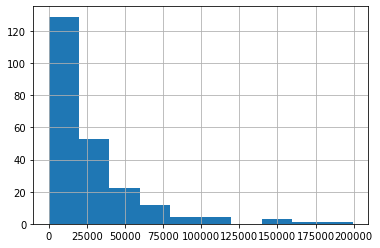

In [12]:
energy_mix_2021['energy_per_capita'].hist()

<AxesSubplot:>

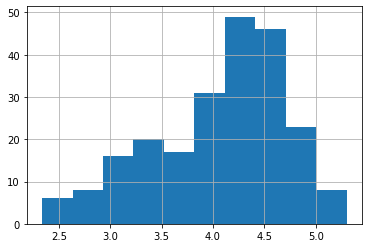

In [13]:
energy_mix_2021['energy_per_capita_log'] = np.log10(energy_mix_2021[energy_mix_2021['energy_per_capita'] != 0]['energy_per_capita'])
energy_mix_2021['energy_per_capita_log'].hist()

<AxesSubplot:>

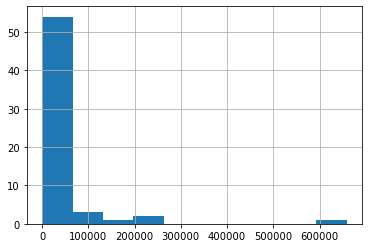

In [14]:
energy_mix_2021['gas_prod_per_capita'].hist()

<AxesSubplot:>

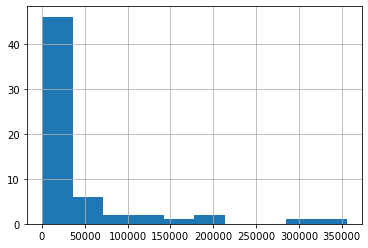

In [15]:
energy_mix_2021['oil_prod_per_capita'].hist()

In [16]:
energy_mix_2021.describe()

,year,population,energy_per_capita,fossil_elec_per_capita,low_carbon_energy_per_capita,low_carbon_share_energy,low_carbon_share_elec,gas_prod_per_capita,oil_prod_per_capita,gas_production,oil_production,energy_per_capita_log
count,284.0,2.300000e+02,229.000000,227.000000,83.000000,92.000000,242.000000,61.000000,61.000000,70.000000,72.000000,224.000000
mean,2021.0,1.393474e+08,25306.549157,2212.945555,9308.633614,20.936554,38.993694,37367.316066,38340.872213,3456.870557,4765.646514,4.064274
std,0.0,6.869374e+08,31268.617712,3151.742140,17896.213514,14.716594,31.087067,95240.535562,72437.117222,6805.827420,9052.501225,0.648696
min,2021.0,1.957000e+03,0.000000,0.000000,5.258000,0.009000,0.000000,39.504000,280.590000,1.303000,24.662000,2.337280
25%,2021.0,1.127240e+06,3833.954000,163.530500,1704.780000,10.643250,11.178750,2116.934000,2507.912000,174.322500,163.483750,3.605638
50%,2021.0,7.459818e+06,16552.881000,1136.651000,5755.948000,17.928000,34.664000,5240.560000,8511.506000,480.473000,685.296500,4.234060
75%,2021.0,3.294449e+07,32491.648000,3126.855000,10167.826000,30.109500,63.667250,28450.100000,27904.283000,2452.274000,4026.251250,4.518836
max,2021.0,7.909295e+09,199419.203000,21704.871000,137492.266000,73.180000,100.000000,658350.688000,355502.219000,40534.203000,49192.051000,5.299767


In [17]:
energy_mix_2021[['oil_prod_per_capita', 'gas_prod_per_capita']] = energy_mix_2021[['oil_prod_per_capita', 'gas_prod_per_capita']].fillna(0)


In [18]:
energy_mix_2021.describe()

,year,population,energy_per_capita,fossil_elec_per_capita,low_carbon_energy_per_capita,low_carbon_share_energy,low_carbon_share_elec,gas_prod_per_capita,oil_prod_per_capita,gas_production,oil_production,energy_per_capita_log
count,284.0,2.300000e+02,229.000000,227.000000,83.000000,92.000000,242.000000,284.000000,284.000000,70.000000,72.000000,224.000000
mean,2021.0,1.393474e+08,25306.549157,2212.945555,9308.633614,20.936554,38.993694,8026.078451,8235.187342,3456.870557,4765.646514,4.064274
std,0.0,6.869374e+08,31268.617712,3151.742140,17896.213514,14.716594,31.087067,46469.952225,36895.379177,6805.827420,9052.501225,0.648696
min,2021.0,1.957000e+03,0.000000,0.000000,5.258000,0.009000,0.000000,0.000000,0.000000,1.303000,24.662000,2.337280
25%,2021.0,1.127240e+06,3833.954000,163.530500,1704.780000,10.643250,11.178750,0.000000,0.000000,174.322500,163.483750,3.605638
50%,2021.0,7.459818e+06,16552.881000,1136.651000,5755.948000,17.928000,34.664000,0.000000,0.000000,480.473000,685.296500,4.234060
75%,2021.0,3.294449e+07,32491.648000,3126.855000,10167.826000,30.109500,63.667250,0.000000,0.000000,2452.274000,4026.251250,4.518836
max,2021.0,7.909295e+09,199419.203000,21704.871000,137492.266000,73.180000,100.000000,658350.688000,355502.219000,40534.203000,49192.051000,5.299767


<AxesSubplot:>

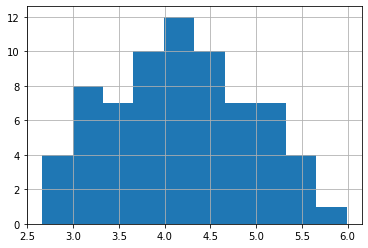

In [19]:
#combine oil and gas energy production per cap for total and log to make normally distributed
energy_mix_2021['oil_and_gas_prod_per_capita'] = energy_mix_2021['oil_prod_per_capita'] + energy_mix_2021['gas_prod_per_capita']
#fill all 0 values as 1 before log
energy_mix_2021['oil_and_gas_prod_per_capita'].replace(0, np.nan, inplace=True)
energy_mix_2021['oil_and_gas_prod_per_capita_log'] = np.log10(energy_mix_2021['oil_and_gas_prod_per_capita'])
energy_mix_2021['oil_and_gas_prod_per_capita_log'].hist()

<AxesSubplot:>

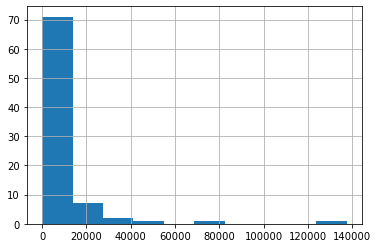

In [20]:
energy_mix_2021['low_carbon_energy_per_capita'].hist()

<AxesSubplot:>

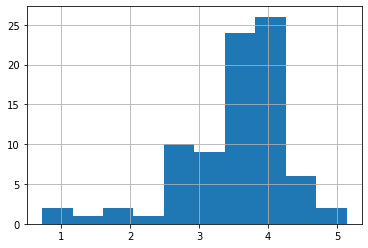

In [21]:
energy_mix_2021['low_carbon_energy_per_capita_log'] = np.log10(energy_mix_2021['low_carbon_energy_per_capita'])
energy_mix_2021['low_carbon_energy_per_capita_log'].hist()

In [22]:
#join on 2018 gdp data
joined_energy_data = pd.merge(left=energy_mix_data.loc[energy_mix_data['year'] == 2018, :][['iso_code', 'gdp']], right=energy_mix_2021, on='iso_code')

In [23]:
#join with price data
joined_energy_data = pd.merge(left=electricity_price_data[['iso3', 'price']], right=joined_energy_data, left_on='iso3', right_on='iso_code')

In [24]:
#check data
joined_energy_data.describe()

,price,gdp,year,population,energy_per_capita,fossil_elec_per_capita,low_carbon_energy_per_capita,low_carbon_share_energy,low_carbon_share_elec,gas_prod_per_capita,oil_prod_per_capita,gas_production,oil_production,energy_per_capita_log,oil_and_gas_prod_per_capita,oil_and_gas_prod_per_capita_log,low_carbon_energy_per_capita_log
count,144.000000,1.340000e+02,144.0,1.440000e+02,144.000000,144.000000,69.00000,66.000000,143.000000,144.000000,144.000000,45.000000,42.000000,144.000000,50.000000,50.000000,69.000000
mean,0.136431,8.419677e+11,2021.0,5.288978e+07,29425.612153,2400.821882,10075.35342,21.267182,45.378818,12364.002736,13951.645757,858.653356,1139.351762,4.153792,75789.067660,4.217399,3.544606
std,0.124700,2.403683e+12,0.0,1.710560e+08,34735.356452,3464.584797,19477.10308,16.407477,32.701061,60451.248892,49729.695395,1731.290644,1791.377926,0.612174,159794.779423,0.822867,0.763921
min,0.001000,3.516161e+09,2021.0,6.421300e+04,410.887000,0.000000,9.54800,0.009000,0.000000,0.000000,0.000000,14.596000,24.662000,2.613722,483.343000,2.684255,0.979912
25%,0.041750,4.883595e+10,2021.0,4.325976e+06,6602.493000,264.986000,1693.77700,8.661000,15.824000,0.000000,0.000000,144.742000,123.440750,3.819038,4038.748000,3.605942,3.228856
50%,0.102000,1.745153e+11,2021.0,1.143389e+07,19880.212000,1190.897500,5755.94800,17.691000,40.494000,0.000000,0.000000,315.259000,430.586500,4.298408,13927.801000,4.139398,3.760117
75%,0.180250,6.365048e+11,2021.0,4.095745e+07,36037.927000,3255.787000,10187.27400,30.884750,74.226500,1448.451250,1481.619250,677.994000,1114.547750,4.556759,65812.590000,4.818307,4.008058
max,0.613000,1.815162e+13,2021.0,1.425894e+09,199419.203000,21704.871000,137492.26600,73.180000,100.000000,658350.688000,355502.219000,9441.419000,8317.922000,5.299767,973392.750000,5.988288,5.138278


In [25]:
joined_energy_data['gdp_per_cap'] = joined_energy_data['gdp'] / joined_energy_data['population']
joined_energy_data['gdp_per_cap_log'] = np.log10(joined_energy_data['gdp'] / joined_energy_data['population'])

In [26]:
#VALUES FOR REPORT

In [27]:
#uk oil and gas prod per cap
joined_energy_data[joined_energy_data['iso_code'] == 'GBR']['oil_and_gas_prod_per_capita'].values[0]

11936.478

In [28]:
#uk oil and gas prod per cap log
joined_energy_data[joined_energy_data['iso_code'] == 'GBR']['oil_and_gas_prod_per_capita_log'].values[0]

4.076876201935375

In [29]:
#global oil and gas prod per cap
joined_energy_data['oil_and_gas_prod_per_capita'].replace(np.nan, 0).mean()

26315.64849305556

In [30]:
#UK low carbon share
joined_energy_data[joined_energy_data['iso_code'] == 'GBR']['low_carbon_share_elec'].values[0]

55.046

In [31]:
#UK GDP
joined_energy_data[joined_energy_data['iso_code'] == 'GBR']['gdp_per_cap_log'].values[0]

4.576976963896021

In [32]:
#global low carbon share
joined_energy_data['low_carbon_share_elec'].replace(np.nan, 0).mean()

45.063687499999986

In [33]:
#SCATTER PLOTS FOR SECTION 3

In [34]:
scatter_chart(data=joined_energy_data, x_var='gdp_per_cap_log', y_var='price', x_label='GDP log($)', y_label='Price (£/kWh)', hover_labels='country')

In [35]:
scatter_chart(data=joined_energy_data, x_var='oil_and_gas_prod_per_capita_log', y_var='price', x_label='Oil and gas production per capita log(tWh)', y_label='Price (£/kWh)', hover_labels='country')

In [36]:
#global relationship of price against renewable share shows negative correlation, this could be caused by higher standards of leaving in countries with high renewable share
scatter_chart(data=joined_energy_data, x_var='low_carbon_share_elec', y_var='price', x_label='Low carbon electricity share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [37]:
#eu + uk only

europe_country_codes = [
    'GBR', 'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 
    'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 
    'SVK', 'SVN', 'ESP', 'SWE'
]

#opposite trend is true for europe but weak relationship
scatter_chart(data=joined_energy_data[joined_energy_data['iso3'].isin(europe_country_codes)], x_var='low_carbon_share_elec', y_var='price', x_label='Low carbon electricity share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [38]:
#plot of price vs usage per cap, again this could be driven by higher standards of living driving up the prices in countries which use more energy
scatter_chart(data=joined_energy_data, x_var='energy_per_capita_log', y_var='price', x_label='Energy usage per capita log(tWH)', y_label='Price (£/kWh)', hover_labels='country')

In [39]:
#Regression modelling for section 4

<AxesSubplot:>

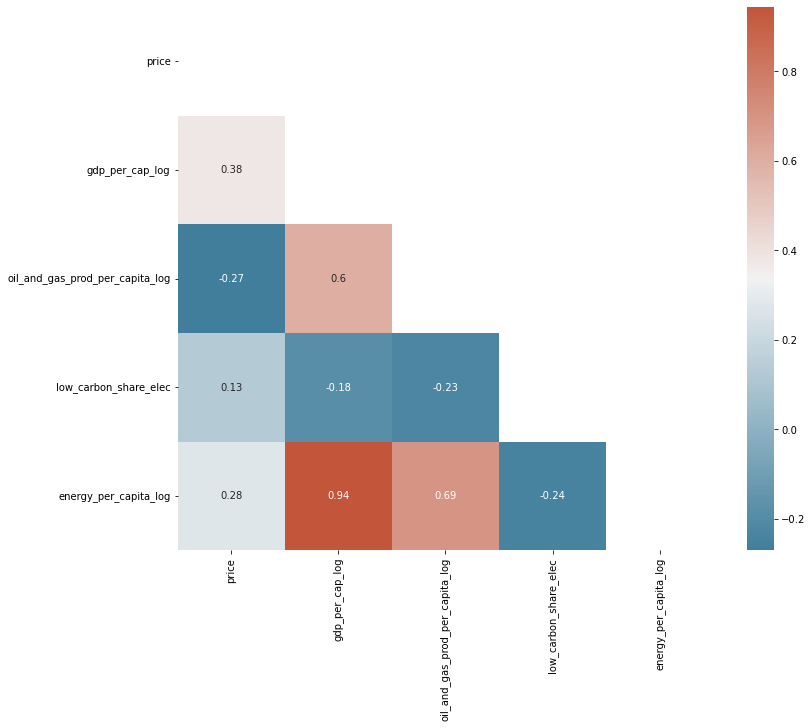

In [40]:
#remove energy per cap as it correlates with gdp per cap
features = joined_energy_data[['price', 'gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_elec', 'energy_per_capita_log']]
corr_matrix = features.corr()


f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask = mask, cmap=cmap)

In [41]:
#drop target
features.drop(['price', 'energy_per_capita_log'], axis=1, inplace=True)

#add constant to predictor variables
features = sm.add_constant(features)

#assign target var
target = joined_energy_data[['price']]

#fit linear regression model
model = sm.OLS(target, features, missing='drop').fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     30.49
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.49e-11
Time:                        12:07:28   Log-Likelihood:                 55.374
No. Observations:                  49   AIC:                            -102.7
Df Residuals:                      45   BIC:                            -95.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

d:\Python37\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
#scaled model to get feature importance
scaler = StandardScaler()

features = joined_energy_data[['gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_elec']]

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target)

In [43]:
#make regression model to explain price - does renewable mix matter? Nope, not once you've controlled for gdp per cap.

features_scaled = sm.add_constant(features_scaled)

#fit linear regression model
scaled_model = sm.OLS(target_scaled, features_scaled, missing='drop').fit()

#view model summary
print(scaled_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     30.49
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.49e-11
Time:                        12:07:28   Log-Likelihood:                -46.807
No. Observations:                  49   AIC:                             101.6
Df Residuals:                      45   BIC:                             109.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4931      0.119     -4.148      0.0

In [44]:
#CLUSTERING EDA - NOT USED IN REPORT

In [66]:
#create data for clustering
cluster_data = joined_energy_data[['price', 'gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_elec']]
cluster_data[['oil_and_gas_prod_per_capita_log', 'low_carbon_share_elec']] = cluster_data[['oil_and_gas_prod_per_capita_log', 'low_carbon_share_elec']].replace(np.nan, 0)
cluster_data = cluster_data.dropna().values

In [67]:
len(cluster_data)

134

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

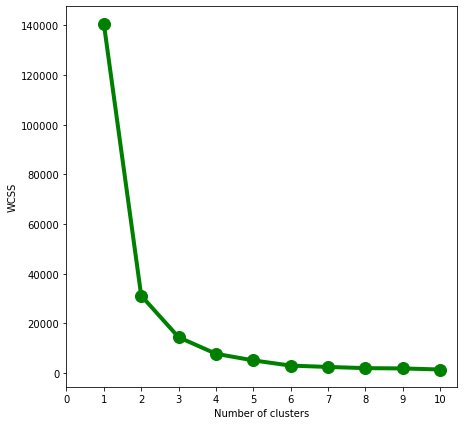

In [68]:
from sklearn.cluster import KMeans

#find the optimal number of clusters using elbow method
#using Within-Cluster Sum of Square as variance metric - WCSS
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters= i, init="random", # method for selecting initial cluster points
                      max_iter=10, # iterations before stopping
                      random_state=123)
    model.fit(cluster_data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11), WCSS, linewidth=4, markersize=12, marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [69]:
#k=4 is optimal
x=cluster_data
model = KMeans(n_clusters = 4, init = 'random', max_iter = 10)
y_clusters = model.fit_predict(cluster_data)

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [48]:
y_clusters

array([2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 0, 2, 2, 3, 2,
       3, 2, 2, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 2, 1, 1, 0, 3, 0, 1,
       3, 3, 3, 1, 3])

In [49]:
x[y_clusters == 0]

array([[2.40000000e-02, 3.69643882e+00, 3.80537225e+00, 2.56520000e+01],
       [3.80000000e-02, 4.36254788e+00, 4.50869340e+00, 1.93140000e+01],
       [6.20000000e-02, 3.79777567e+00, 2.68425543e+00, 2.19470000e+01],
       [7.50000000e-02, 4.05055035e+00, 3.55638368e+00, 1.81730000e+01],
       [7.70000000e-02, 4.19966653e+00, 4.07497795e+00, 2.73270000e+01],
       [1.11000000e-01, 4.19585893e+00, 3.82537671e+00, 1.45070000e+01],
       [1.55000000e-01, 4.43933967e+00, 3.00602382e+00, 1.70950000e+01],
       [1.81000000e-01, 4.67926359e+00, 4.81588428e+00, 2.91350000e+01]])

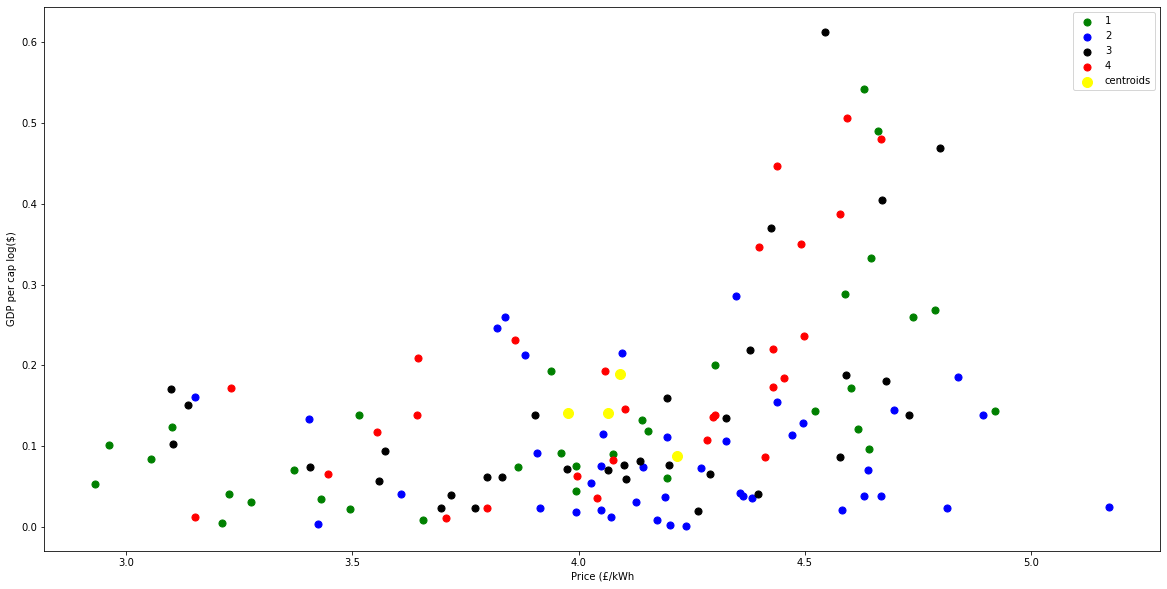

In [70]:
#2D plot

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,1],x[y_clusters == 0,0],s = 50, c = 'green', label = "1")
plt.scatter(x[y_clusters == 1,1],x[y_clusters == 1,0],s = 50, c = 'blue', label = "2")
plt.scatter(x[y_clusters == 2,1],x[y_clusters == 2,0],s = 50, c = 'black', label = "3")
plt.scatter(x[y_clusters == 3,1],x[y_clusters == 3,0],s = 50, c = 'red', label = "4")
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Price (£/kWh")
plt.ylabel("GDP per cap log($)")
plt.legend()
plt.show()

In [51]:
# display 3 var results using 3d scatter (renewable share, oil + gas prod, price)
#display 4 var results on 2d plot using pca
#get avg values for each cluster and find which cluster uk is in, join cluster label to o.g dataframe and groupby to get mean/s.d for each var for each cluster
#could impute values to make cluster results better
#use regression model to see if UK is outlier for elec price based on input var